In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=======================

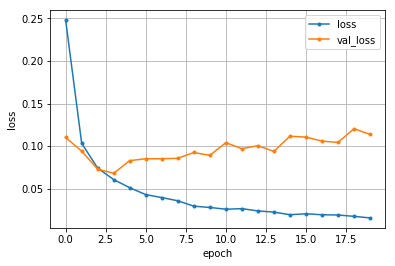

In [8]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

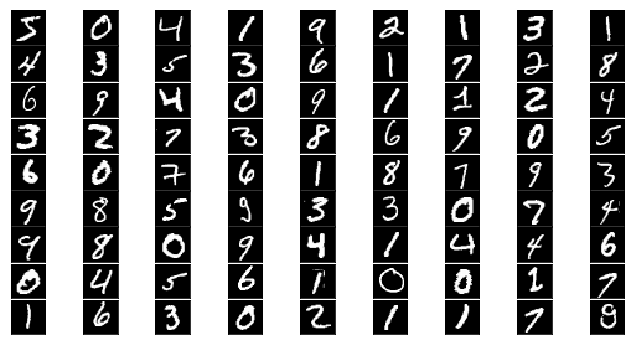

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [33]:
x_train.shape

(60000, 784)

In [82]:
x_test[0].shape

(784,)

〇 9 / 9 (100.0 %)
〇 9 / 9 (100.0 %)
〇 0 / 0 (100.0 %)
〇 5 / 5 (100.0 %)
× 2 / 9 (67.938 %)
〇 2 / 2 (100.0 %)
〇 1 / 1 (100.0 %)
〇 0 / 0 (100.0 %)
× 9 / 4 (93.211 %)
〇 7 / 7 (100.0 %)


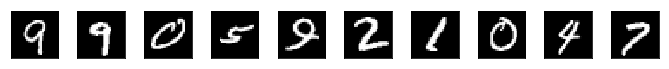

In [79]:
import numpy as np
import random
#新しいウィンドウを描画
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.4)
#テストデータをランダムに選択する準備
tstlist = list(range(10000))
random.shuffle(tstlist)
#ランダムに選択した10件を検証データとして表示
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[tstlist[i]].reshape((28, 28)), cmap='gray')
    
for i in range(10):
    data = np.asarray(x_test[tstlist[i]]).reshape((-1, 784))
    res = model.predict([data])[0]
    y = res.argmax()
    per = round(float(res[y] * 100),3) # --- 正解率を小数3桁精度(四捨五入)で求める
    ydata = y_test[tstlist[i]].argmax() # --- 正解
    if y == ydata:
        print("〇 {0} / {1} ({2} %)".format(y, ydata, per))
    else:
        print("× {0} / {1} ({2} %)".format(y, ydata, per))

In [69]:
ii = 7964
data = np.asarray(x_test[ii]).reshape((-1, 784))
print(x_test[7964].shape)
print(data.shape)
res = model.predict([data])[0]
y = res.argmax()
per = round(float(res[y] * 100),3) # --- 正解率を小数3桁精度(四捨五入)で求める
print("{0} ({1} %)".format(y, per))
print(res)

(784,)
(1, 784)
9 (99.744 %)
[6.3599499e-12 3.7873775e-08 1.7936420e-09 3.2874615e-07 7.8171724e-05
 3.5623106e-07 4.8714694e-13 7.5292377e-07 2.4848501e-03 9.9743551e-01]


In [80]:
# モデルとウェイトをjsonとhdf5ファイルに保存
model_json_str = model.to_json()
open('mnist_mlp_model.json', 'w').write(model_json_str)
model.save_weights('mnist_mlp_weights.hdf5')

In [81]:
# モデルとウェイトをjsonとhdf5ファイルからロード
from keras.models import model_from_json
model = model_from_json(open('mnist_mlp_model.json').read())
model.load_weights('mnist_mlp_weights.hdf5')